In [1]:
save_name = 'CustomPneumonia_Pneumonia'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

In [3]:
from modules.lib.StandardTraining import *
from modules.models.CustomPneumonia import CustomPneumoniaNN

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')


Working on device=cuda


In [5]:
training_columns = ['Pneumonia']
out_channels=len(training_columns)
net_kwargs = {'out_channels':out_channels, 'image_size':(224,224)}
net = CustomPneumoniaNN(**net_kwargs)

net = nn.DataParallel(net)
net.to(device)

summary(net, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 512, 224, 224]          13,312
       BatchNorm2d-2        [-1, 512, 224, 224]           1,024
         MaxPool2d-3        [-1, 512, 112, 112]               0
            Conv2d-4        [-1, 256, 112, 112]       1,179,904
       BatchNorm2d-5        [-1, 256, 112, 112]             512
         MaxPool2d-6          [-1, 256, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]         147,520
       BatchNorm2d-8           [-1, 64, 56, 56]             128
         MaxPool2d-9           [-1, 64, 28, 28]               0
           Linear-10                 [-1, 1024]      51,381,248
          Dropout-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
          Dropout-13                  [-1, 512]               0
           Linear-14                   

In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=8, 
                                     learning_rate=1e-5, 
                                     num_epochs=1,
                                     device=device, 
                                     net=net,
                                     image_width = 224, #Model more memory consuming so pare down size
                                     image_height = 224,
                                     target_columns=training_columns,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'CustomPneumoniaNN',
                                     net_kwargs = net_kwargs)

Number of Training Images: 105,432
Number of Validation Images: 26,316


In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/1]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1735.5338         
Time of Completion: 2020-08-03 00:35:09.861524          
Training Duration: 0:36:13.987874          
Validation Duration: 0:03:41.354797

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pneumonia,2808,4,0.999961,0.973366,0.986484,0.527681,0.028859



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pneumonia,703,0,1.0,0.973286,0.986462,0.582755,0.035619


Training Duration: 0:39:55.472301



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.973329
Hamming Loss,0.026671
Hamming Accuracy,0.973329
Combined Recall,0.999961
Combined Precision,0.973366
Combined F1,0.986484


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pneumonia,2808,4,0.999961,0.973366,0.986484,0.527681,0.028859


***** ROC *****


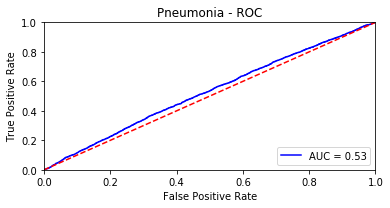

***** Precision / Recall *****


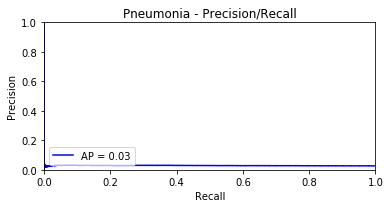


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.973286
Hamming Loss,0.026714
Hamming Accuracy,0.973286
Combined Recall,1.000000
Combined Precision,0.973286
Combined F1,0.986462


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Pneumonia,703,0,1.0,0.973286,0.986462,0.582755,0.035619


***** ROC *****


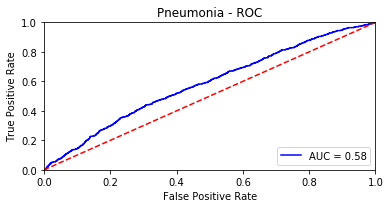

***** Precision / Recall *****


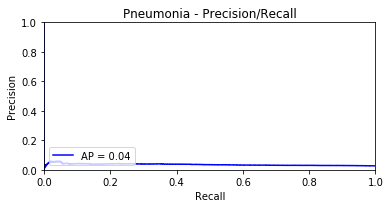

In [8]:
standardTraining.displayMetrics()

In [9]:
standardTraining.save()